In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
#Impoart data set and packages

In [7]:
df.head()
df.dtypes
#highlevel review of dataset

School DBN                     object
School Name                    object
School Level                   object
Regents Exam                   object
Year                            int64
Total Tested                    int64
Mean Score                     object
Number Scoring Below 65        object
Percent Scoring Below 65       object
Number Scoring 65 or Above     object
Percent Scoring 65 or Above    object
Number Scoring 80 or Above     object
Percent Scoring 80 or Above    object
Number Scoring CR              object
Percent Scoring CR             object
dtype: object

In [7]:
df['School Name'].unique()
#Review list of school names to chose 1 for comparison to comparator group

array(['P.S. 034 Franklin D. Roosevelt', 'P.S. 140 Nathan Straus',
       'P.S. 184m Shuang Wen', ..., 'Family Life Academy Charter School',
       'Harriet Tubman Charter School', 'Icahn Charter School'],
      dtype=object)

In [8]:
df['Regents Exam'].unique()
#Review list of exam names to choose one as a feature for comparison

array(['Common Core Algebra', 'Living Environment', 'Common Core English',
       'Algebra2/Trigonometry', 'Common Core Algebra2',
       'Common Core Geometry', 'English', 'Geometry',
       'Global History and Geography', 'Integrated Algebra',
       'Physical Settings/Chemistry', 'Physical Settings/Earth Science',
       'U.S. History and Government', 'Physical Settings/Physics', nan],
      dtype=object)

In [8]:
df.drop('Number Scoring Below 65',axis=1,inplace=True)
df.drop('Percent Scoring Below 65',axis=1,inplace=True)
df.drop('Number Scoring 80 or Above',axis=1,inplace=True)
df.drop('Percent Scoring 80 or Above',axis=1,inplace=True)
df.drop('Number Scoring CR',axis=1,inplace=True)
df.drop('Percent Scoring CR',axis=1,inplace=True)
df.drop('Number Scoring 65 or Above',axis=1,inplace=True)
df.drop('Percent Scoring 65 or Above',axis=1,inplace=True)
#Drop columns not needed for analysis

In [10]:
df.head()
#confirm columns were dropped

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s


In [9]:
df.groupby(['School Level'])['Mean Score'].count()
#see unique values to school level, choosing group with largest amount of data

School Level
Elementary                             25
High school                        151160
Junior High-Intermediate-Middle     15742
K-12 all grades                      8294
K-8                                  6858
Secondary School                    30252
Name: Mean Score, dtype: int64

In [10]:
df2=df[df['School Level'] == 'K-8']
#filtering rows only for K-8 so as to choose one school and compare to remaining K-8 group

In [13]:
df2.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s


In [11]:
df2.groupby(['School Level'])['Mean Score'].count()
#Confirm school level rows outside of K-8 were dropped in new dataframe

School Level
K-8    6858
Name: Mean Score, dtype: int64

In [12]:
df3=df2[df2['Regents Exam'] == 'Common Core Algebra']
#filtering rows only for Common Core Algebra

In [13]:
df3.groupby(['Regents Exam'])['Mean Score'].count()
#Confirm regents exam rows outside of Common Core Algebra were dropped in new dataframe

Regents Exam
Common Core Algebra    3211
Name: Mean Score, dtype: int64

In [73]:
df3.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79


In [14]:
df4 = df3[df3['Mean Score']!='s']
#Drop rows with non-numerical mean score
#convert mean score to float type to support numerical analysis
df4=df4.astype({'Mean Score':'float'})
df4.dtypes

School DBN       object
School Name      object
School Level     object
Regents Exam     object
Year              int64
Total Tested      int64
Mean Score      float64
dtype: object

In [15]:
df4.describe()
#descriptive stats

,Year,Total Tested,Mean Score
count,1522.000000,1522.000000,1522.000000
mean,2016.103154,23.008541,76.212484
std,0.820835,17.467183,9.351088
min,2015.000000,6.000000,41.000000
25%,2015.000000,11.000000,70.200000
50%,2016.000000,18.000000,78.000000
75%,2017.000000,29.000000,83.375000
max,2017.000000,166.000000,94.900000


In [16]:
df5 = df4[df4['School Name']=='Icahn Charter School']
df5 = df5.drop_duplicates('Year')
df5.drop('School DBN',axis=1,inplace=True)
df5.drop('School Level',axis=1,inplace=True)
df5.drop('Regents Exam',axis=1,inplace=True)
df5.drop('Total Tested',axis=1,inplace=True)
df5.head()
#create data frame with just comparator school removing duplicate years and drop remaining columns no longer needed

,School Name,Year,Mean Score
19471,Icahn Charter School,2015,83.6
19472,Icahn Charter School,2016,87.6
19473,Icahn Charter School,2017,87.7


In [29]:
df6 = df4[df4['School Name']!='Icahn Charter School']
df7=df6.groupby(['Year']).apply(lambda x: pd.Series({'Mean Score': np.average(x['Mean Score'], weights=x['Total Tested'])}))
df7.loc[:,'School Name'] = 'All Other K-8'
df7.insert(2,"Years",(2015,2016,2017))
df7.head()
#create df with all other K-8 schools with weighted average mean score

,Mean Score,School Name,Years
Year,,,
2015,71.427455,All Other K-8,2015
2016,78.820256,All Other K-8,2016
2017,78.356695,All Other K-8,2017


In [32]:
df9=df5.rename(columns={'Year':'Years'})
df10=df9.merge(df7,how='outer')
df10
#merge dataframes

,School Name,Years,Mean Score
0,Icahn Charter School,2015,83.600000
1,Icahn Charter School,2016,87.600000
2,Icahn Charter School,2017,87.700000
3,All Other K-8,2015,71.427455
4,All Other K-8,2016,78.820256
5,All Other K-8,2017,78.356695


School Name
All Other K-8           AxesSubplot(0.125,0.125;0.775x0.755)
Icahn Charter School    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

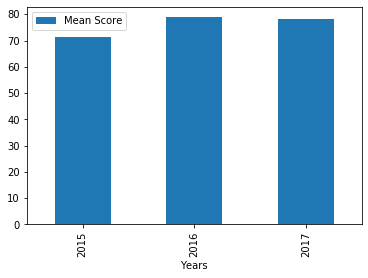

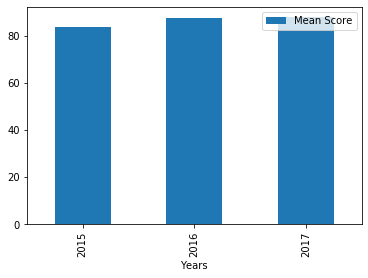

In [34]:
df10.groupby(['School Name']).plot(x="Years",y="Mean Score", kind="bar")

In [74]:
#analysis shows that Icahn Charter School as outperformed the average of K-8 schools on the Common Core Alegbra regents exam in all documented years (2015-2017).

3211
3211


School Name      object
Regents Exam     object
Year              int64
Total Tested      int64
Mean Score      float64
dtype: object

count    1522.000000
mean       76.212484
std         9.351088
min        41.000000
25%        70.200000
50%        78.000000
75%        83.375000
max        94.900000
Name: Mean Score, dtype: float64


Year  School Name         
2015  All Other K-8           AxesSubplot(0.125,0.125;0.775x0.755)
      Icahn Charter School    AxesSubplot(0.125,0.125;0.775x0.755)
2016  All Other K-8           AxesSubplot(0.125,0.125;0.775x0.755)
      Icahn Charter School    AxesSubplot(0.125,0.125;0.775x0.755)
2017  All Other K-8           AxesSubplot(0.125,0.125;0.775x0.755)
      Icahn Charter School    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

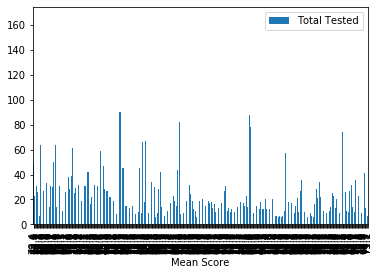

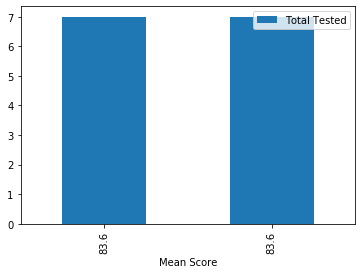

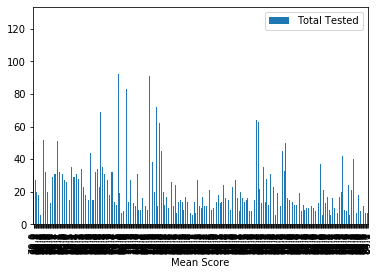

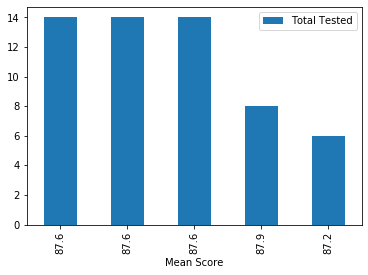

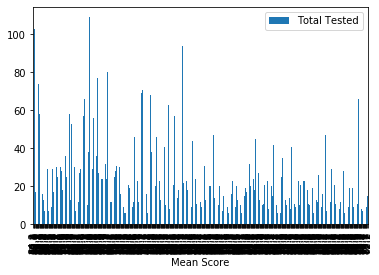

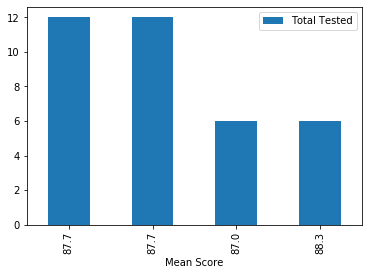

School Name
All Other K-8           1511
Icahn Charter School      11
Name: Mean Score, dtype: int64

School Name      object
Regents Exam     object
Year              int64
Mean Score      float64
dtype: object